# Tests with Synthetic Data
Some artifically created tests with synthetic data to show the (voronoi-)ridge-based parameter sensitivity analysis.

In [ ]:
import sys
sys.path.extend(["../../"])
from src.para_voro import *
from src.para_voro_plots import *

## 1D Examples

### Two samples of different label
Expectations: should result in one ridge in the middle of length 0, i.e., the count is one.

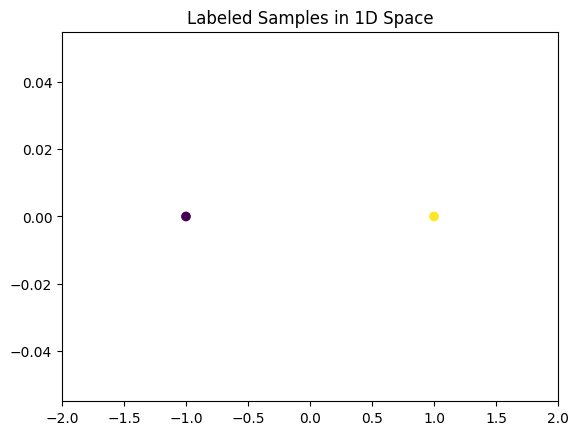

<Axes: title={'center': 'Labeled Samples in 1D Space'}>

In [2]:
samples = np.array([
    [-1.0], [1.0]
])

labels = np.array([0, 1])

aabbox = np.array([[-2.0, 2.0]])

bandwidths = np.array([0.1])

plot_data(samples, labels, aabbox)

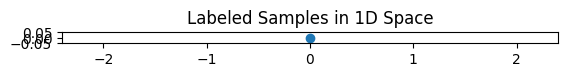

<Axes: title={'center': 'Labeled Samples in 1D Space'}>

In [3]:
ridge_vertices = generate_geometric_segment_boundaries_via_voronoi(samples=samples, labels=labels, clip_bbox=aabbox)
plot_ridges(ridge_vertices, samples, labels, aabbox)

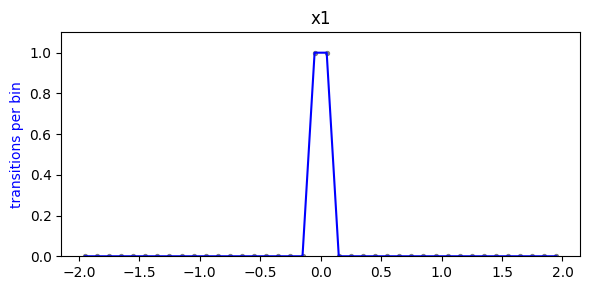

In [4]:
sample_points, sensitivities = ridge_based_para_sense(ridge_vertices=ridge_vertices, bandwidths=bandwidths, clip_box=aabbox, verbose=False)
plot_sensitivities(sample_points, sensitivities)

## Three samples of different labels
Expectations: Should result in 2 ridges between each sample pair.

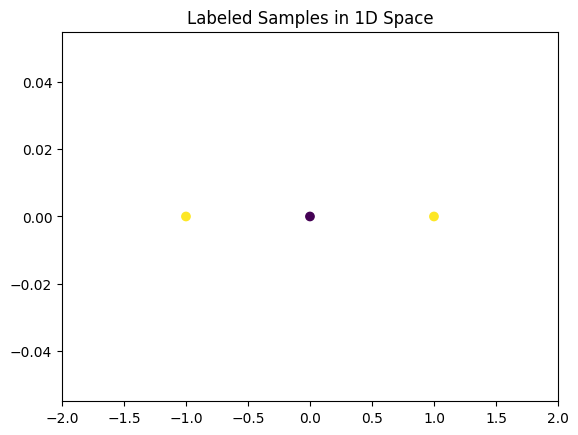

<Axes: title={'center': 'Labeled Samples in 1D Space'}>

In [5]:
samples = np.array([
    [-1.0], [0.0], [1.0]
])

labels = np.array([1, 0, 1])

aabbox = np.array([[-2.0, 2.0]])

bandwidths = np.array([0.1])

plot_data(samples, labels, aabbox)

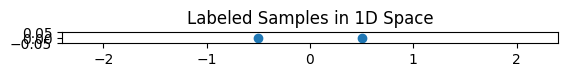

<Axes: title={'center': 'Labeled Samples in 1D Space'}>

In [6]:
ridge_vertices = generate_geometric_segment_boundaries_via_voronoi(samples=samples, labels=labels, clip_bbox=aabbox)
plot_ridges(ridge_vertices, samples, labels, aabbox)

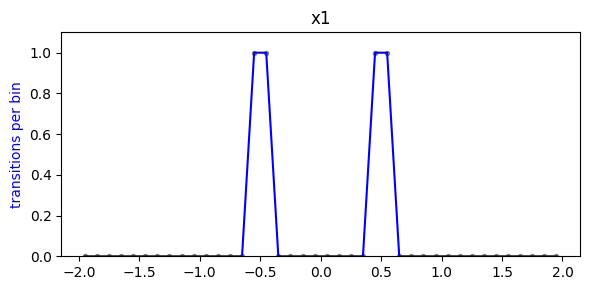

In [7]:
sample_points, sensitivities = ridge_based_para_sense(ridge_vertices=ridge_vertices, bandwidths=bandwidths, clip_box=aabbox, verbose=False)
plot_sensitivities(sample_points, sensitivities)

## More samples around 0.0 to have larger ridge there
Expectations: two small ridges left and right and one higher one in the center

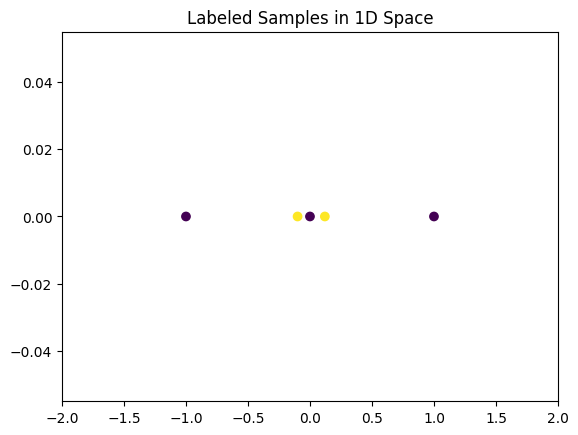

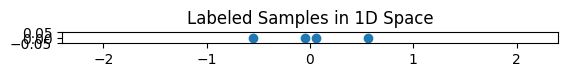

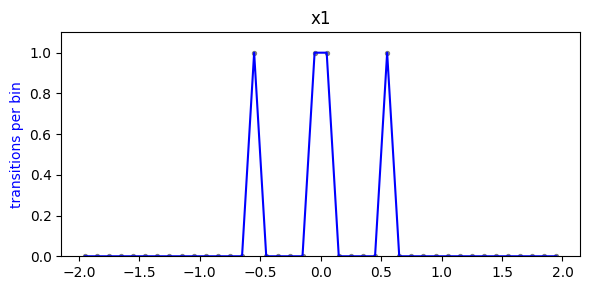

In [8]:
samples = np.array([
    [-1.0], [-0.1], [0.0], [0.12], [1.0]
])

labels = np.array([0, 1, 0, 1, 0])

aabbox = np.array([[-2.0, 2.0]])

bandwidths = np.array([0.1])

plot_data(samples, labels, aabbox)

ridge_vertices = generate_geometric_segment_boundaries_via_voronoi(samples=samples, labels=labels, clip_bbox=aabbox)
plot_ridges(ridge_vertices, samples, labels, aabbox)

sample_points, sensitivities = ridge_based_para_sense(ridge_vertices=ridge_vertices, bandwidths=bandwidths, clip_box=aabbox, verbose=False)
plot_sensitivities(sample_points, sensitivities)

# 2D Examples

## 2D Example with two infinity ridges

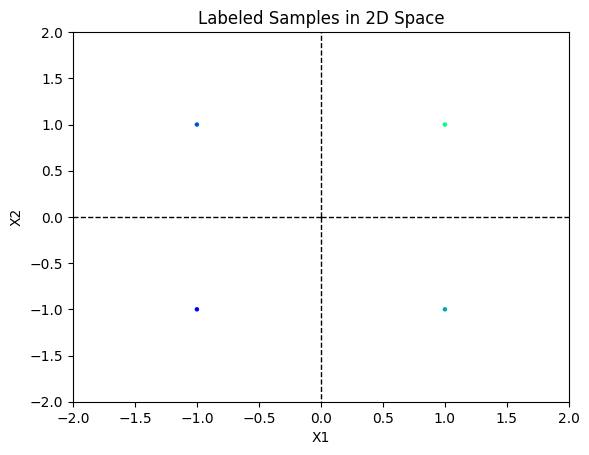

c:\Users\bauerrn\Projekte\VoroParaSense\examples\notebooks\../..\src\para_voro.py:308: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 1, 'C', False, aligned=True), Array(float64, 1, 'A', False, aligned=True))
  d = np.dot(points[i], ridge_halfspace_definition[:-1]) + ridge_halfspace_definition[-1]


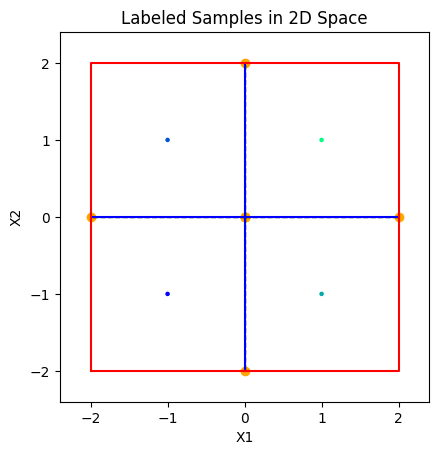

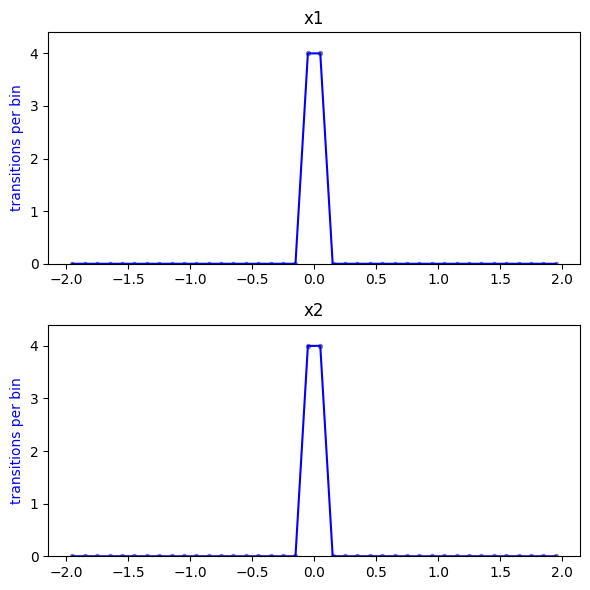

In [9]:
samples = np.array([
    [-1.0, -1.0],
    [-1.0, 1.0],
    [1.0, -1.0],
    [1.0, 1.0],
])

labels = np.array([0, 1, 2, 3])

aabbox = np.array([
    [-2.0, 2.0], 
    [-2.0, 2.0]
])

bandwidths = np.array([0.1, 0.1])

plot_data(samples, labels, aabbox)

ridge_vertices = generate_geometric_segment_boundaries_via_voronoi(samples=samples, labels=labels, clip_bbox=aabbox)
plot_ridges(ridge_vertices, samples, labels, aabbox)

sample_points, sensitivities = ridge_based_para_sense(ridge_vertices=ridge_vertices, bandwidths=bandwidths, clip_box=aabbox, verbose=False)
plot_sensitivities(sample_points, sensitivities)

## 2D Example with two infinite ridge but two are not counted

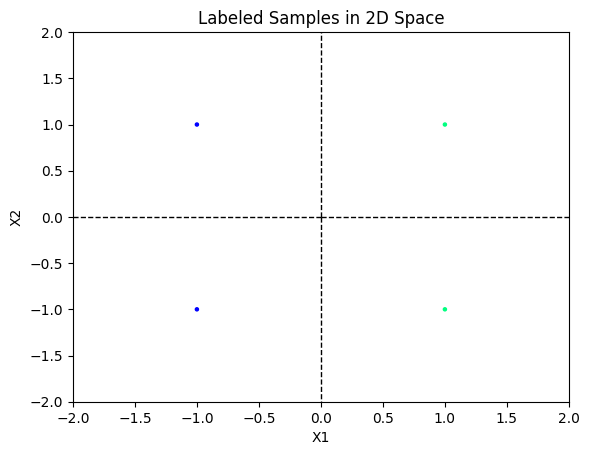

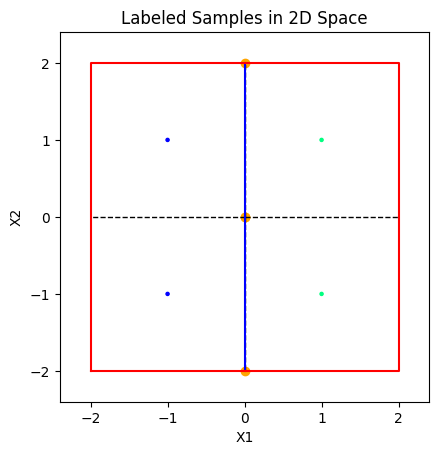

c:\Users\bauerrn\Projekte\VoroParaSense\examples\notebooks\../..\src\para_voro.py:798: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(0.0, sens_values.max() * 1.1)


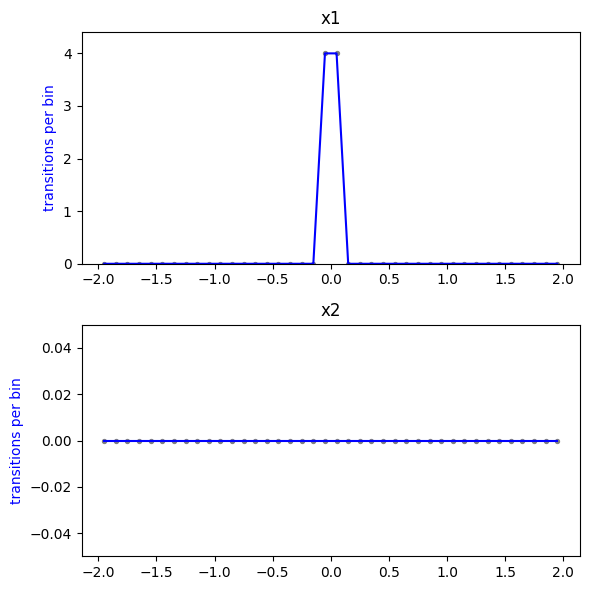

In [10]:
samples = np.array([
    [-1.0, -1.0],
    [-1.0, 1.0],
    [1.0, -1.0],
    [1.0, 1.0],
])

labels = np.array([0, 0, 2, 2])

aabbox = np.array([
    [-2.0, 2.0], 
    [-2.0, 2.0]
])

bandwidths = np.array([0.1, 0.1])

plot_data(samples, labels, aabbox)

ridge_vertices = generate_geometric_segment_boundaries_via_voronoi(samples=samples, labels=labels, clip_bbox=aabbox)
plot_ridges(ridge_vertices, samples, labels, aabbox)

sample_points, sensitivities = ridge_based_para_sense(ridge_vertices=ridge_vertices, bandwidths=bandwidths, clip_box=aabbox, verbose=False)
plot_sensitivities(sample_points, sensitivities)

# Artificial Ridges High Horizontal Frequency

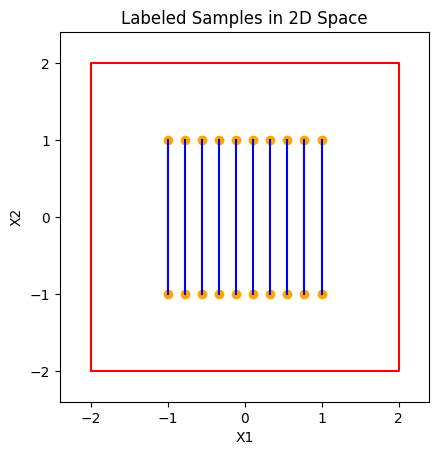

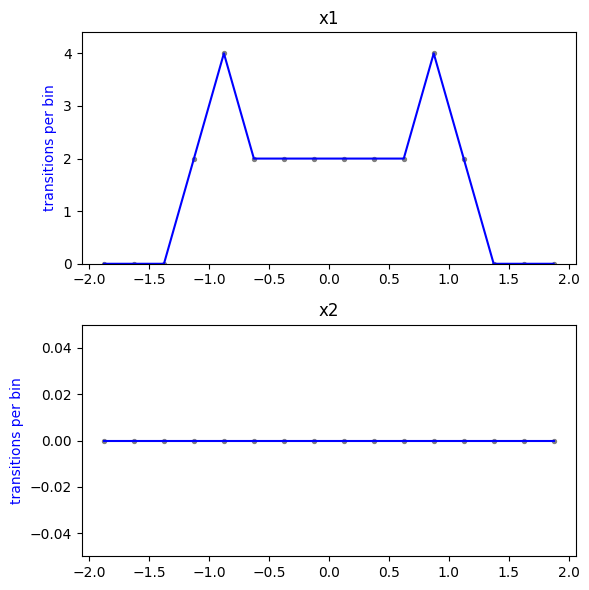

In [11]:
aabbox = np.array([
    [-2.0, 2.0], 
    [-2.0, 2.0]
])

bandwidths = np.array([0.25, 0.25])

x_pos = np.linspace(-1.0, 1.0, 10)
ridge_vertices = make_object_array([np.array([[x, -1.0], [x, 1.0]]) for x in x_pos])
plot_ridges(ridge_vertices, clip_box=aabbox)

sample_points, sensitivities = ridge_based_para_sense(ridge_vertices=ridge_vertices, bandwidths=bandwidths, clip_box=aabbox, verbose=False)
plot_sensitivities(sample_points, sensitivities)

# Artificial Ridges with additional high frequencies in the center

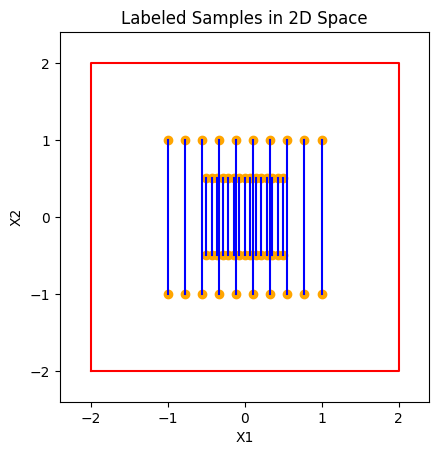

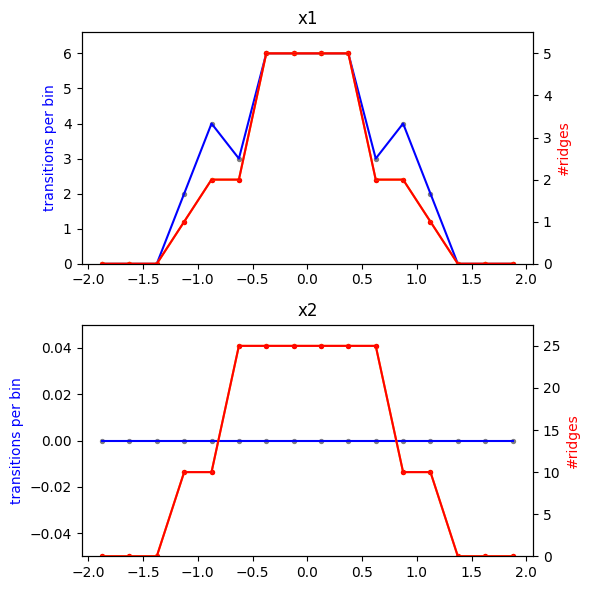

In [12]:
aabbox = np.array([
    [-2.0, 2.0], 
    [-2.0, 2.0]
])

bandwidths = np.array([0.25, 0.25])

x_pos = np.linspace(-1.0, 1.0, 10)
x_pos_2 = np.linspace(-0.5, 0.5, 15)
ridge_vertices = make_object_array([np.array([[x, -1.0], [x, 1.0]]) for x in x_pos] + [np.array([[x, -0.5], [x, 0.5]]) for x in x_pos_2])
plot_ridges(ridge_vertices, clip_box=aabbox)

sample_points, sensitivities, n_ridges = ridge_based_para_sense(ridge_vertices=ridge_vertices, bandwidths=bandwidths, clip_box=aabbox, return_n_ridges=True, verbose=False)
plot_sensitivities(sample_points, sensitivities, n_ridges=n_ridges)

# Ridges Rotated

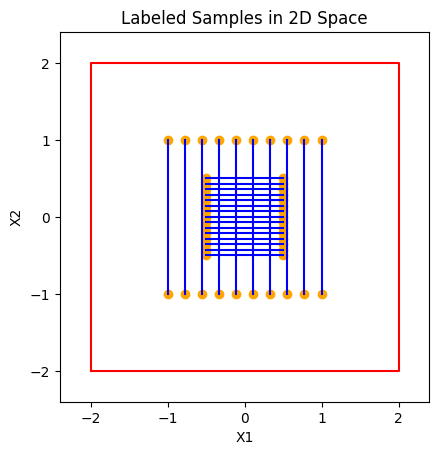

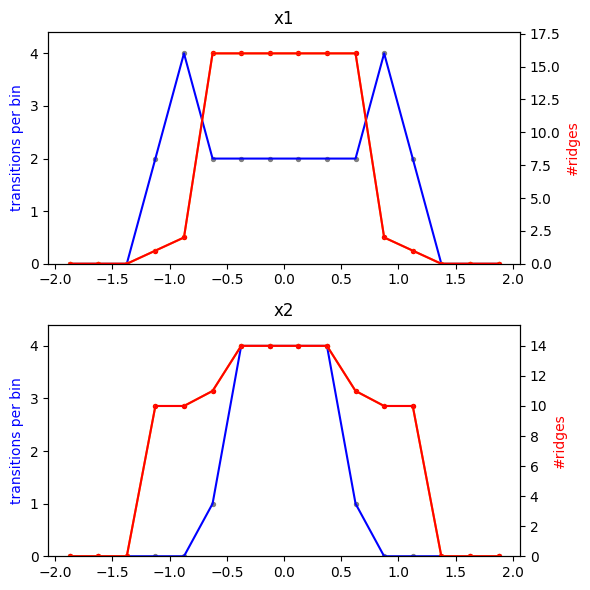

In [13]:
aabbox = np.array([
    [-2.0, 2.0], 
    [-2.0, 2.0]
])

bandwidths = np.array([0.25, 0.25])

x_pos = np.linspace(-1.0, 1.0, 10)
y_pos = np.linspace(-0.5, 0.5, 15)
ridge_vertices = make_object_array([np.array([[x, -1.0], [x, 1.0]]) for x in x_pos] + [np.array([[-0.5, y], [0.5, y]]) for y in y_pos])
plot_ridges(ridge_vertices, clip_box=aabbox)

sample_points, sensitivities, n_ridges = ridge_based_para_sense(ridge_vertices=ridge_vertices, bandwidths=bandwidths, clip_box=aabbox, return_n_ridges=True, verbose=False)
plot_sensitivities(sample_points, sensitivities, n_ridges=n_ridges)

# Diagonal Ridges 2D

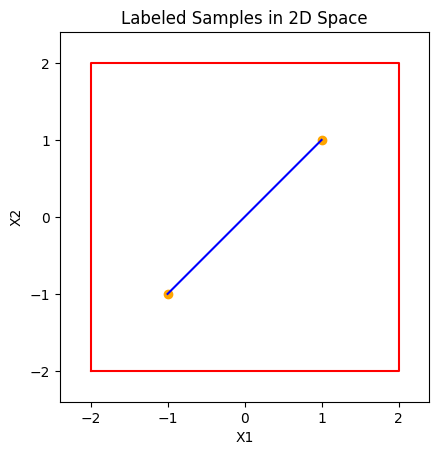

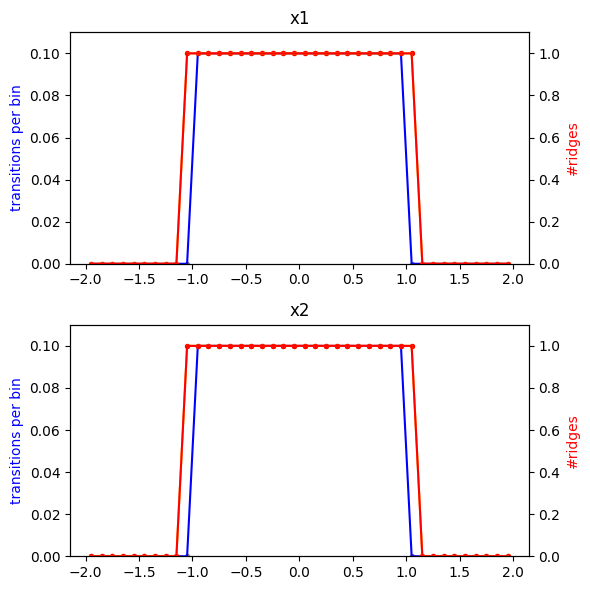

In [14]:
aabbox = np.array([
    [-2.0, 2.0], 
    [-2.0, 2.0]
])

bandwidths = np.array([0.1, 0.1])

ridge_vertices = make_object_array([
    np.array([
        [-1.0, -1.0], 
        [1.0, 1.0]
    ])
])
plot_ridges(ridge_vertices, clip_box=aabbox)

sample_points, sensitivities, n_ridges = ridge_based_para_sense(ridge_vertices=ridge_vertices, bandwidths=bandwidths, clip_box=aabbox, return_n_ridges=True, verbose=False)
plot_sensitivities(sample_points, sensitivities, n_ridges=n_ridges)

## Two diagonal 2D Ridges

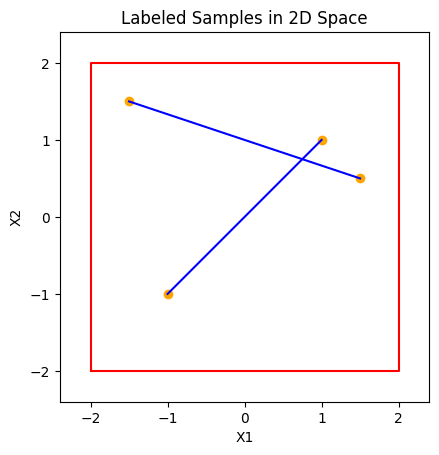

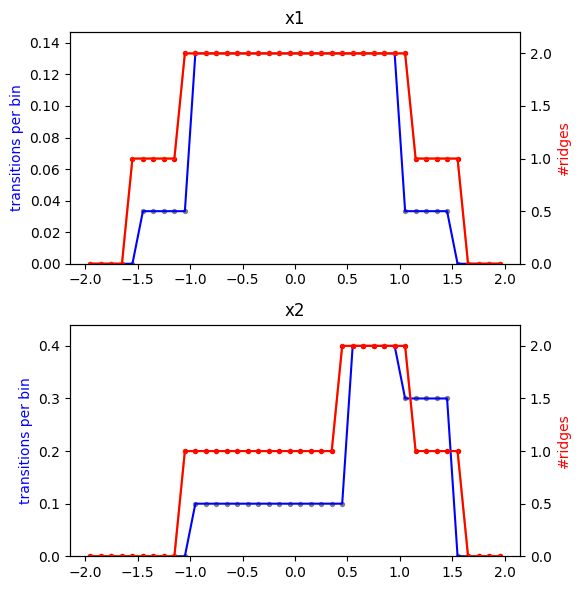

In [15]:
aabbox = np.array([
    [-2.0, 2.0], 
    [-2.0, 2.0]
])

bandwidths = np.array([0.1, 0.1])

ridge_vertices = make_object_array([
    np.array([
        [-1.0, -1.0], 
        [1.0, 1.0]
    ]),
    np.array([
        [-1.5, 1.5],
        [1.5, 0.5]
    ])
])
plot_ridges(ridge_vertices, clip_box=aabbox)

sample_points, sensitivities, n_ridges = ridge_based_para_sense(ridge_vertices=ridge_vertices, bandwidths=bandwidths, clip_box=aabbox, return_n_ridges=True, verbose=False)
plot_sensitivities(sample_points, sensitivities, n_ridges=n_ridges)

# 3D Ridges

## Flat Surface (Quad) in 3D

[[-2. -2. -2.]
 [-2.  2. -2.]
 [ 2.  2. -2.]
 [ 2. -2. -2.]]


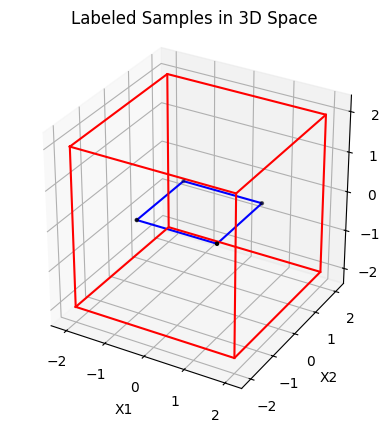

c:\Users\bauerrn\Projekte\VoroParaSense\examples\notebooks\../..\src\para_voro.py:798: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(0.0, sens_values.max() * 1.1)


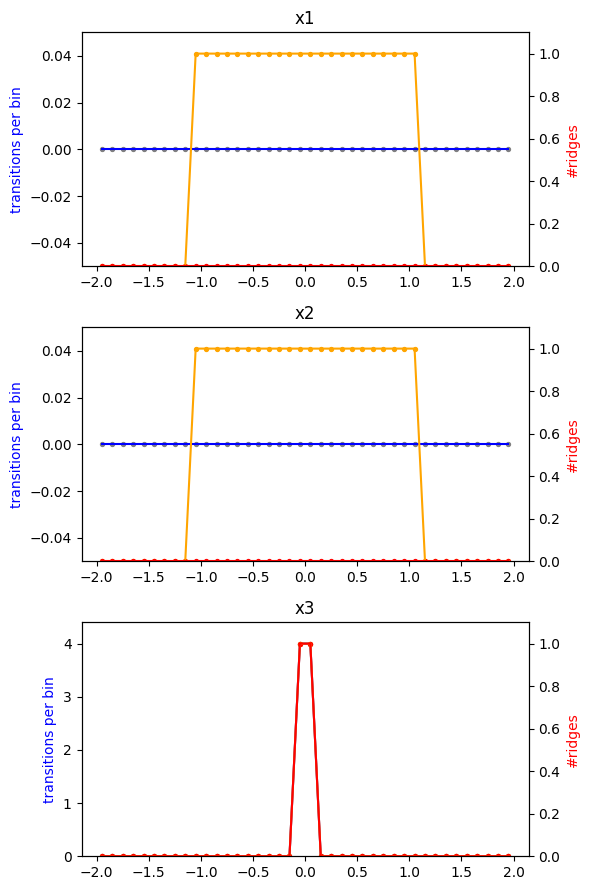

In [16]:
aabbox = np.array([
    [-2.0, 2.0],
    [-2.0, 2.0], 
    [-2.0, 2.0]
])

bandwidths = np.array([0.1, 0.1, 0.1])

ridge_vertices = make_object_array([
    np.array([
        [-1.0, -1.0, 0.0], 
        [-1.0, 1.0, 0.0],
        [1.0, 1.0, 0.0],
        [1.0, -1.0, 0.0],
    ])
])
plot_ridges(ridge_vertices, clip_box=aabbox)

sample_points, sensitivities, n_ridges = ridge_based_para_sense(ridge_vertices=ridge_vertices, bandwidths=bandwidths, clip_box=aabbox, return_n_ridges=True, verbose=False)
plot_sensitivities(sample_points, sensitivities, n_ridges=n_ridges)

# Flat Surface (Triangle) in 3D

[[-2. -2. -2.]
 [-2.  2. -2.]
 [ 2.  2. -2.]
 [ 2. -2. -2.]]


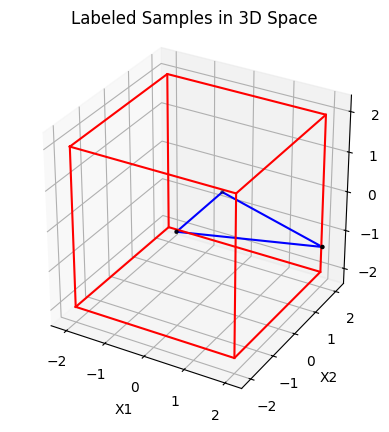

c:\Users\bauerrn\Projekte\VoroParaSense\examples\notebooks\../..\src\para_voro.py:798: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(0.0, sens_values.max() * 1.1)


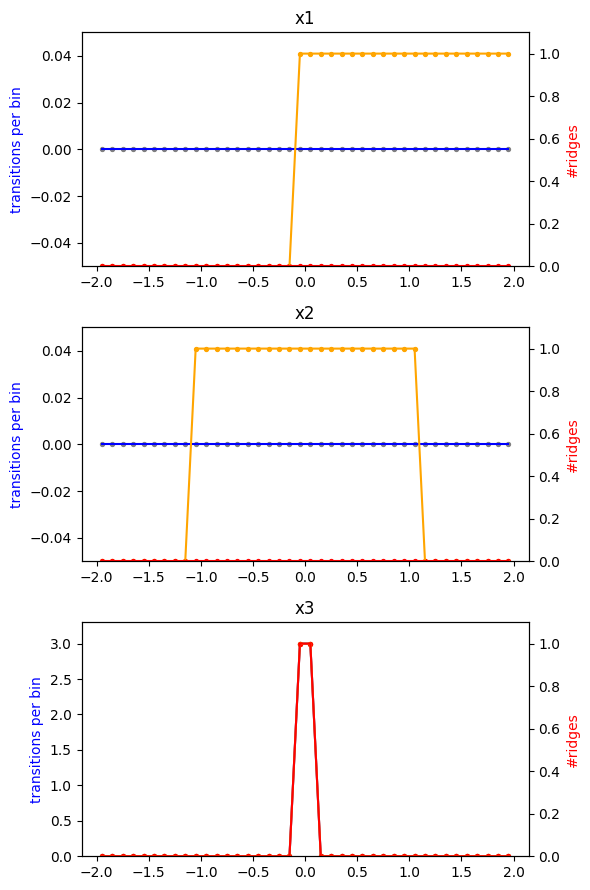

In [17]:
aabbox = np.array([
    [-2.0, 2.0],
    [-2.0, 2.0], 
    [-2.0, 2.0]
])

bandwidths = np.array([0.1, 0.1, 0.1])

ridge_vertices = make_object_array([
    np.array([
        [0.0, -1.0, 0.0], 
        [3.0, 0.0, 0.0],
        [0.0, 1.0, 0.0],
    ])
])
plot_ridges(ridge_vertices, clip_box=aabbox)

sample_points, sensitivities, n_ridges = ridge_based_para_sense(ridge_vertices=ridge_vertices, bandwidths=bandwidths, clip_box=aabbox, return_n_ridges=True, verbose=False)
plot_sensitivities(sample_points, sensitivities, n_ridges=n_ridges)

# Tilted Triangle in 3D

[[-2. -2. -2.]
 [-2.  2. -2.]
 [ 2.  2. -2.]
 [ 2. -2. -2.]]


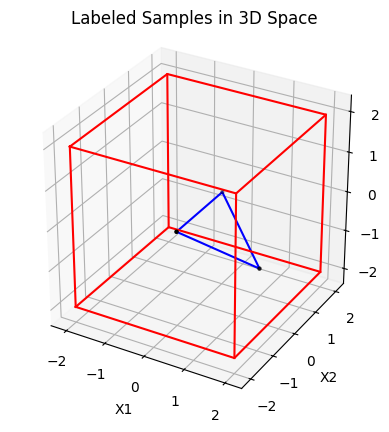

c:\Users\bauerrn\Projekte\VoroParaSense\examples\notebooks\../..\src\para_voro.py:798: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(0.0, sens_values.max() * 1.1)


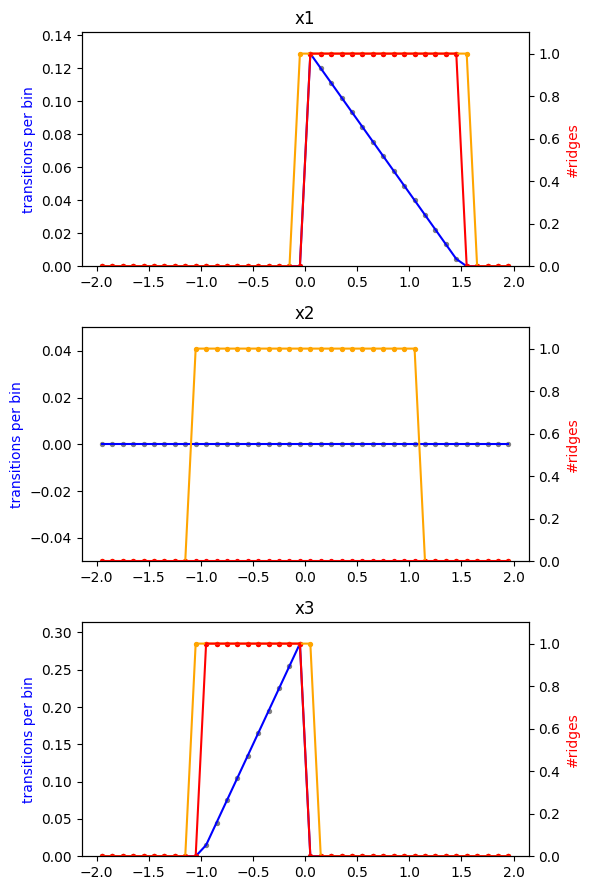

In [18]:
aabbox = np.array([
    [-2.0, 2.0],
    [-2.0, 2.0], 
    [-2.0, 2.0]
])

bandwidths = np.array([0.1, 0.1, 0.1])

ridge_vertices = make_object_array([
    np.array([
        [0.0, -1.0, 0.0], 
        [1.5, 0.0, -1.0],
        [0.0, 1.0, 0.0],
    ])
])
plot_ridges(ridge_vertices, clip_box=aabbox)

sample_points, sensitivities, n_ridges = ridge_based_para_sense(ridge_vertices=ridge_vertices, bandwidths=bandwidths, clip_box=aabbox, return_n_ridges=True, verbose=False)
plot_sensitivities(sample_points, sensitivities, n_ridges=n_ridges)

# Two tilted Triangles in 3D

[[-2. -2. -2.]
 [-2.  2. -2.]
 [ 2.  2. -2.]
 [ 2. -2. -2.]]


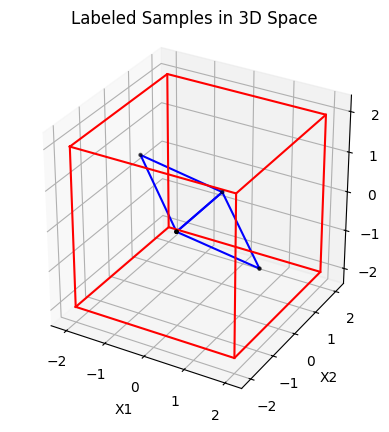

c:\Users\bauerrn\Projekte\VoroParaSense\examples\notebooks\../..\src\para_voro.py:798: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(0.0, sens_values.max() * 1.1)


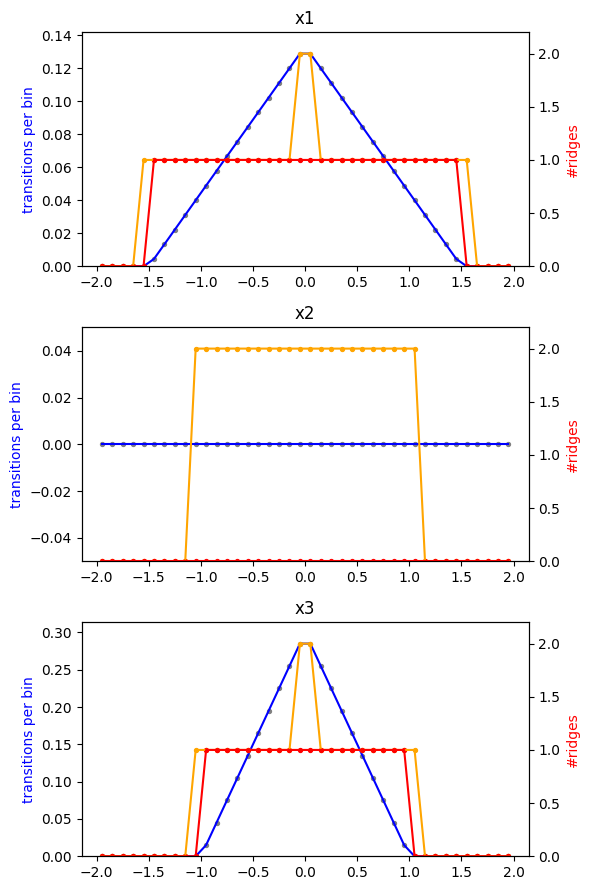

In [19]:
aabbox = np.array([
    [-2.0, 2.0],
    [-2.0, 2.0], 
    [-2.0, 2.0]
])

bandwidths = np.array([0.1, 0.1, 0.1])

ridge_vertices = make_object_array([
    np.array([
        [0.0, -1.0, 0.0], 
        [1.5, 0.0, -1.0],
        [0.0, 1.0, 0.0],
    ]),
    -np.array([
        [0.0, -1.0, 0.0], 
        [1.5, 0.0, -1.0],
        [0.0, 1.0, 0.0],
    ])
])
plot_ridges(ridge_vertices, clip_box=aabbox)

sample_points, sensitivities, n_ridges = ridge_based_para_sense(ridge_vertices=ridge_vertices, bandwidths=bandwidths, clip_box=aabbox, return_n_ridges=True, verbose=False)
plot_sensitivities(sample_points, sensitivities, n_ridges=n_ridges)

[[-2. -2. -2.]
 [-2.  2. -2.]
 [ 2.  2. -2.]
 [ 2. -2. -2.]]


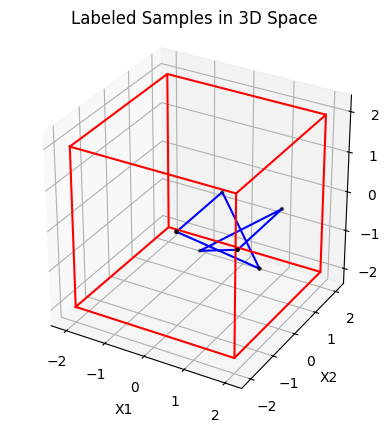

c:\Users\bauerrn\Projekte\VoroParaSense\examples\notebooks\../..\src\para_voro.py:798: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(0.0, sens_values.max() * 1.1)


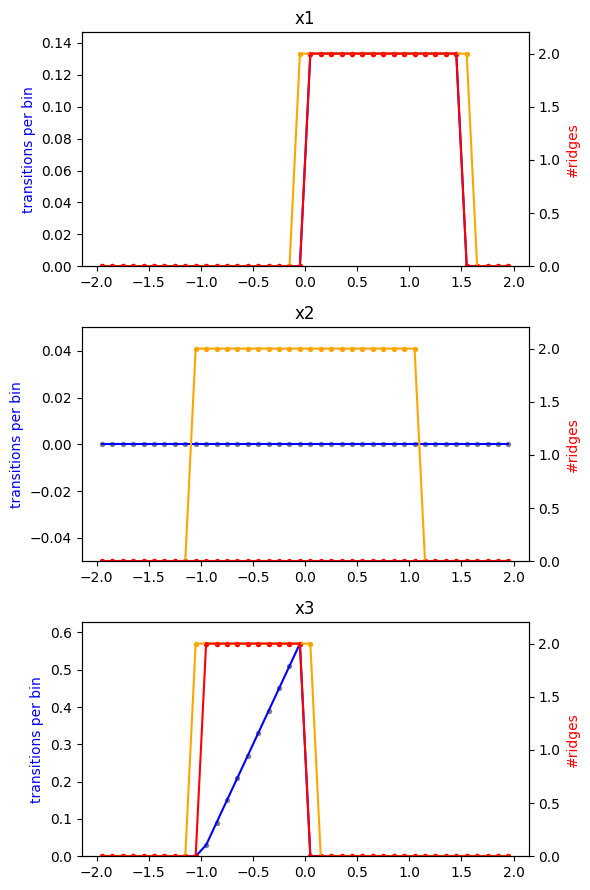

In [20]:
aabbox = np.array([
    [-2.0, 2.0],
    [-2.0, 2.0], 
    [-2.0, 2.0]
])

bandwidths = np.array([0.1, 0.1, 0.1])

ridge_vertices = make_object_array([
    np.array([
        [0.0, -1.0, 0.0], 
        [1.5, 0.0, -1.0],
        [0.0, 1.0, 0.0],
    ]),
    np.array([
        [1.5, -1.0, 0.0], 
        [0.0, 0.0, -1.0],
        [1.5, 1.0, 0.0],
    ])
])
plot_ridges(ridge_vertices, clip_box=aabbox)

sample_points, sensitivities, n_ridges = ridge_based_para_sense(ridge_vertices=ridge_vertices, bandwidths=bandwidths, clip_box=aabbox, return_n_ridges=True, verbose=False)
plot_sensitivities(sample_points, sensitivities, n_ridges=n_ridges)

# A 3D Cube from 2D Ridges in 3D

[[-2. -2. -2.]
 [-2.  2. -2.]
 [ 2.  2. -2.]
 [ 2. -2. -2.]]


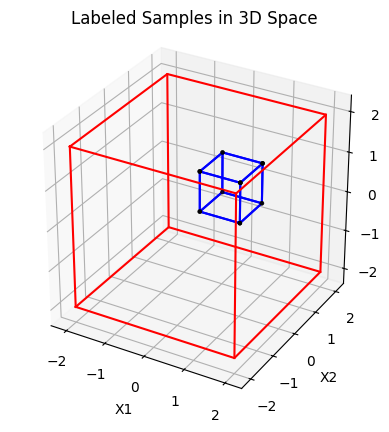

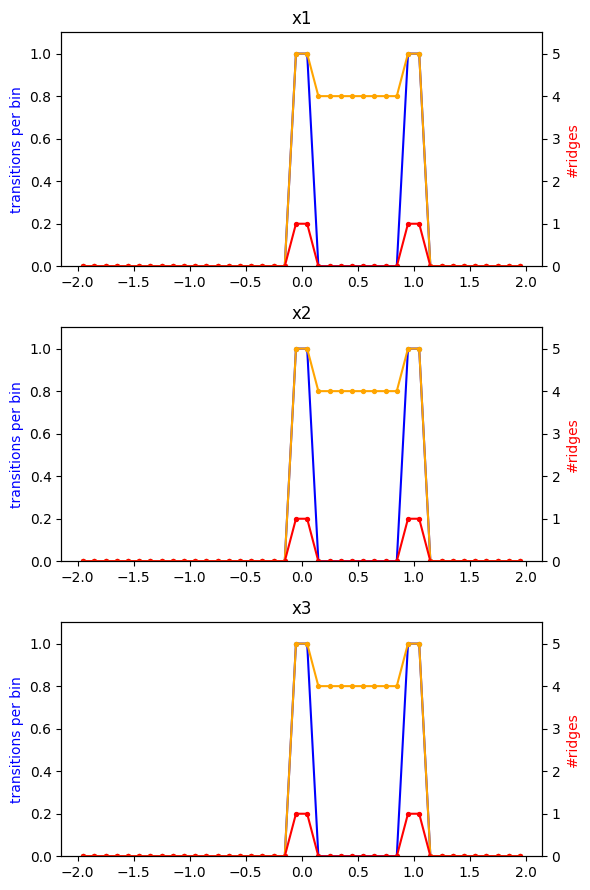

In [21]:
aabbox = np.array([
    [-2.0, 2.0],
    [-2.0, 2.0], 
    [-2.0, 2.0]
])

bandwidths = np.array([0.1, 0.1, 0.1])

flat = np.array([
        [0.0, 0.0, 0.0], 
        [0.0, 1.0, 0.0],
        [1.0, 1.0, 0.0],
        [1.0, 0.0, 0.0],
    ])

flat2 = np.array([
        [0.0, 0.0, 0.0], 
        [0.0, 0.0, 1.0],
        [0.0, 1.0, 1.0],
        [0.0, 1.0, 0.0],
    ])

flat3 = np.array([
        [0.0, 0.0, 0.0], 
        [0.0, 0.0, 1.0],
        [1.0, 0.0, 1.0],
        [1.0, 0.0, 0.0],
    ])

ridge_vertices = make_object_array([
    flat,
    flat + np.array([0, 0, 1]),
    flat2,
    flat2 + np.array([1.0, 0.0, 0.0]),
    flat3,
    flat3 + np.array([0.0, 1.0, 0.0])
])
plot_ridges(ridge_vertices, clip_box=aabbox)

sample_points, sensitivities, n_ridges = ridge_based_para_sense(ridge_vertices=ridge_vertices, bandwidths=bandwidths, clip_box=aabbox, return_n_ridges=True, verbose=False)
plot_sensitivities(sample_points, sensitivities, n_ridges=n_ridges)

# A 3D-Cube Ridge in 4D

c:\Users\bauerrn\Projekte\VoroParaSense\examples\notebooks\../..\src\para_voro.py:798: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(0.0, sens_values.max() * 1.1)


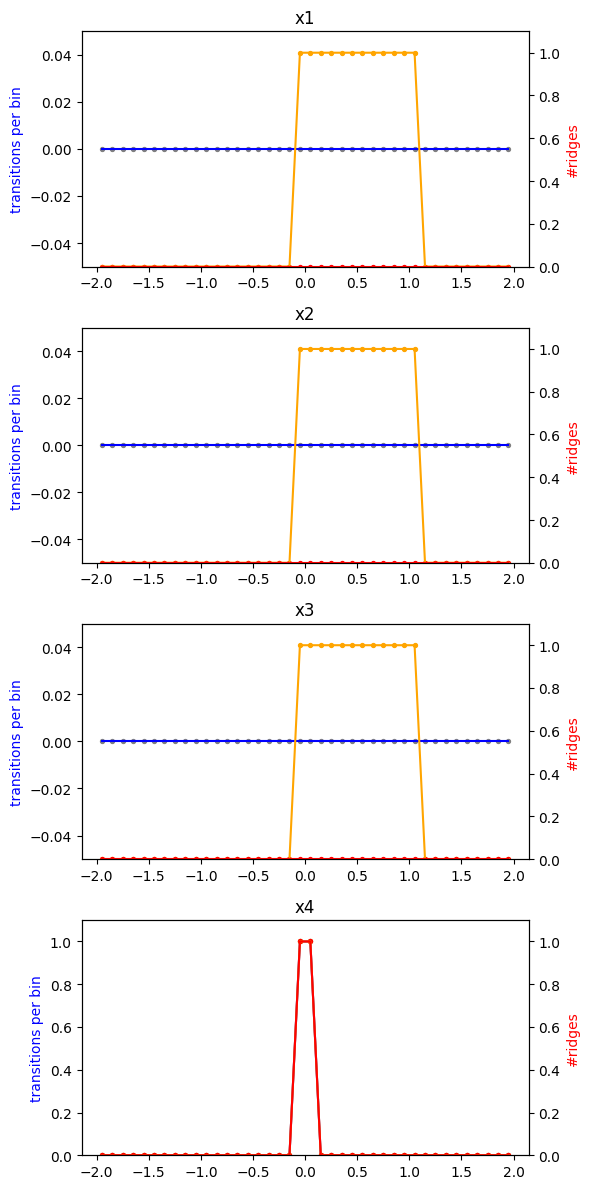

In [22]:
aabbox = np.array([
    [-2.0, 2.0],
    [-2.0, 2.0], 
    [-2.0, 2.0],
    [-2.0, 2.0],
])

bandwidths = np.array([0.1, 0.1, 0.1, 0.1])

flat = np.array([
        [0.0, 0.0, 0.0, 0.0], 
        [0.0, 1.0, 0.0, 0.0],
        [1.0, 1.0, 0.0, 0.0],
        [1.0, 0.0, 0.0, 0.0],
    ])

flat2 = np.array([
        [0.0, 0.0, 0.0, 0.0], 
        [0.0, 0.0, 1.0, 0.0],
        [0.0, 1.0, 1.0, 0.0],
        [0.0, 1.0, 0.0, 0.0],
    ])

flat3 = np.array([
        [0.0, 0.0, 0.0, 0.0], 
        [0.0, 0.0, 1.0, 0.0],
        [1.0, 0.0, 1.0, 0.0],
        [1.0, 0.0, 0.0, 0.0],
    ])

cube_3d_in_4d = np.vstack([
    flat,
    flat + np.array([0, 0, 1, 0.0]),
    flat2,
    flat2 + np.array([1.0, 0.0, 0.0, 0.0]),
    flat3,
    flat3 + np.array([0.0, 1.0, 0.0, 0.0])
])

ridge_vertices = make_object_array([cube_3d_in_4d])

# plot_ridges(ridge_vertices, clip_box=aabbox)

sample_points, sensitivities, n_ridges = ridge_based_para_sense(ridge_vertices=ridge_vertices, bandwidths=bandwidths, clip_box=aabbox, return_n_ridges=True, verbose=False)
plot_sensitivities(sample_points, sensitivities, n_ridges=n_ridges)